# Assignment 2 - TTC Delays Data Analysis and Report
By: Polina Kabakova, Gauri Kawlay, Jon Lubanski, Megan Strain, & Mengxu Zhao

## 1. Introduction

With 1.7 million riders every day, the Toronto Transit Commission (TTC) is a vital part of day-to-day life in Toronto. Last year, the TTC uploaded an in-depth look at the subway delays that occur every day to the City of Toronto Open Data Catalogue. This data, which is updated monthly, shows that the TTC experiences dozens of delays each day, interrupting commuter traffic and leading to increasing dissatisfaction amongst users (Spurr, et. al., 2017). To combat this, in 2015 the TTC wrote a five-year plan to reduced delays by fifty percent by modernizing the system and improving response times. They plan to implement a new software system that will modernize the signalling and speed control system, a safety mechanism that tracks subway speed and maintains a requisite amount of space between cars (Ferreira, 2016). Implementation of the Automatic Train Control (ATC) system began in the fall of 2017, with the TTC proclaiming the initial testing a success (Spurr, 2017). This report will assess the location and type of delays within the TTC network to pinpoint where service disruptions are most likely to occur and their most common causes. After starting with a broad overview of the TTC system in general, the report will focus on Miscellaneous Speed Control delays at Keele Station to assess what impact delays have on an individual station and the prevalence of Speed Control delays over time. 


## 2. Methods and Data

In order to obtain the dataset we needed for our project, we downloaded a publically available file from the Open Data Catalogue on the City of Toronto website. The data contains information on all the TTC Subway and SRT Train Service Delays. We then used various Python libraries to organize and plot the data to evaluate correlations and patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib 
# For one of the graphs in the assignment we needed another function other than pyplot from the Matplot library.
import seaborn as sns 
plt.style.use('seaborn')
%matplotlib inline

ImportError: No module named seaborn


### Step 1

In order to begin our analysis we loaded all the dataframes we selected for our analysis into Jupyter. These include TTC Subway Delays for Jan 2014 - April 2017 and single month data for December 2017 as well as January and February of 2018. We’ve omitted the May – October of 2017 data from our analysis, as we wanted to compare the data before and after the start of implementation of the new signalling system as opposed to during the months of initial testing as that data might not reflect the performance of the system once it is installed.


In [5]:
ttc_df = pd.read_csv('delays.csv') # TTC Subway Delays (Jan 2014 - April 2017) 
ttc_dec = pd.read_csv('decdelays.csv') # TTC Subway Delays (December 2017)
ttc_jan = pd.read_csv('jandelays.csv') # TTC Subway Delays (January 2018)
ttc_feb = pd.read_csv('febdelays.csv') # TTC Subway Delays (February 2018)
frames = [ttc_dec, ttc_jan, ttc_feb]
new_ttc_df = pd.concat(frames) 
# Concatenation operation. Helps ensure that the indexes are not overwritten in the process of merging.


### Step 2

We used the data to determine which stations had the most delays. We decided to plot the total delay data for all the top ten stations to compare the statistics.

In [6]:
# To defend why we chose Keele
ttc_df['Station'].value_counts()

KIPLING STATION           2409
KENNEDY BD STATION        1811
FINCH STATION             1797
VICTORIA PARK STATION     1632
DOWNSVIEW STATION         1564
KEELE STATION             1516
EGLINTON STATION          1491
WARDEN STATION            1364
BLOOR STATION             1358
ISLINGTON STATION         1205
ST CLAIR WEST STATION     1194
WILSON STATION            1099
JANE STATION              1090
COXWELL STATION            949
DAVISVILLE STATION         916
EGLINTON WEST STATION      899
LAWRENCE STATION           882
ST GEORGE BD STATION       867
ST GEORGE YUS STATION      821
YONGE SHP STATION          790
YORK MILLS STATION         747
GREENWOOD STATION          745
DUNDAS WEST STATION        714
SHEPPARD STATION           671
YONGE UNIVERSITY SPADI     665
YONGE BD STATION           654
OLD MILL STATION           643
YONGE/UNIVERSITY/SPADI     642
LAWRENCE WEST STATION      642
OSSINGTON STATION          637
                          ... 
KEELE STATION - DEPART       1
MIDLAND 

In [7]:
# Convert panda series to data frame
ttc_df_station = ttc_df['Station'].value_counts()
ttc_df_station = ttc_df_station.to_frame().reset_index()
# Rename the columns
ttc_df_station.columns = ['Station', 'Counts']
ttc_df_station

,Station,Counts
0,KIPLING STATION,2409
1,KENNEDY BD STATION,1811
2,FINCH STATION,1797
3,VICTORIA PARK STATION,1632
4,DOWNSVIEW STATION,1564
5,KEELE STATION,1516
6,EGLINTON STATION,1491
7,WARDEN STATION,1364
8,BLOOR STATION,1358
9,ISLINGTON STATION,1205


In [8]:
ttc_df_station_top10 = ttc_df_station[0:10]
ttc_df_station_top10

,Station,Counts
0,KIPLING STATION,2409
1,KENNEDY BD STATION,1811
2,FINCH STATION,1797
3,VICTORIA PARK STATION,1632
4,DOWNSVIEW STATION,1564
5,KEELE STATION,1516
6,EGLINTON STATION,1491
7,WARDEN STATION,1364
8,BLOOR STATION,1358
9,ISLINGTON STATION,1205


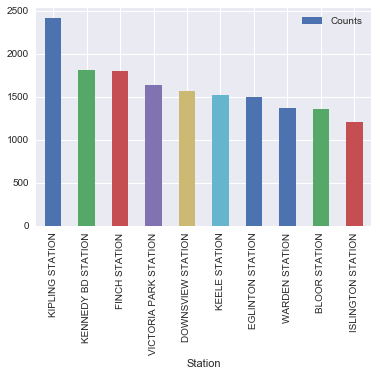

In [9]:
_ = ttc_df_station_top10.plot.bar(x = 'Station', y = 'Counts')


### Step 3

We decided to look at Keele Station’s delays in more detail because it was one of the non-terminal stations that had the most delays and we wanted to discover why. We isolated the delays at the station by code, which indicates the type of delay. We discovered that the most frequently encountered delay at Keele was Miscellaneous Speed Control (MUSC) which refers to delays caused by a safety mechanism that tracks subway cars’ speed to warn operators if they need to slow down and can automatically activate the emergency brakes (Ferreira, 2016). The speed control mechanism is part of the original ‘fixed block’ signalling system which uses a block system to ensure trains remain a safe distance apart. Only one train can be in each block at a time and the block in front and behind must also be clear (Spurr, 2017). This system is old and overly sensitive which results in frequent, unnecessary delays (Ferreira, 2016). 

In [10]:
ttc_df_keele = ttc_df.loc[ttc_df['Station'].str.contains('KEELE STATION')]
ttc_df_keele.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
70,2014/01/02,09:07,Thursday,KEELE STATION,TUSC,0,0,E,BD,5052
161,2014/01/03,18:55,Friday,KEELE STATION (EAST OF,MUPLB,27,31,E,BD,5201
233,2014/01/05,19:45,Sunday,KEELE STATION,SUAP,6,11,E,BD,5099
310,2014/01/07,06:45,Tuesday,KEELE STATION,MUDD,3,6,E,BD,5001
410,2014/01/08,15:03,Wednesday,KEELE STATION,EUSC,0,0,W,BD,5212


In [11]:
ttc_df_keele['Code'].value_counts()

MUSC     1322
TUSC      233
MUIS       60
SUDP       33
MUPLB      25
MUPAA      21
SUO        16
MUNCA      16
PUMEL      16
MUDD       15
PUTIJ      15
MUI        15
MUTO       13
MUIR       13
EUDO       12
EUSC       11
EUBK       11
TUMVS      10
PUSI       10
MUO        10
SUUT        9
PUSO        8
MUSAN       8
PUSTC       6
MUIRS       6
PUSIS       6
SUAP        6
PUTIS       5
EUNT        5
PUSSW       5
         ... 
PUSNT       4
EUPI        4
PUMST       4
PUTD        4
TUO         3
MUPLC       3
PUTR        3
TUCC        3
TUOS        3
SUSA        3
EUVA        2
PUTSC       2
SUROB       2
PUSCR       2
PUCSC       2
MUGD        1
PUMO        1
EUCA        1
EULV        1
EUYRD       1
PUTSM       1
SUAE        1
PUTS        1
TUDOE       1
EUME        1
PUTO        1
PUTOE       1
EUBO        1
TUNOA       1
MUTD        1
Name: Code, Length: 64, dtype: int64

In [12]:
#convert panda series to data frame
ttc_df_keele_code = ttc_df_keele['Code'].value_counts()
ttc_df_keele_code = ttc_df_keele_code.to_frame().reset_index()
#rename the columns
ttc_df_keele_code.columns = ['Code', 'Counts']
ttc_df_keele_code

,Code,Counts
0,MUSC,1322
1,TUSC,233
2,MUIS,60
3,SUDP,33
4,MUPLB,25
5,MUPAA,21
6,SUO,16
7,MUNCA,16
8,PUMEL,16
9,MUDD,15


In [13]:
ttc_df_keele_code_top6 = ttc_df_keele_code[0:6]
ttc_df_keele_code_top6

,Code,Counts
0,MUSC,1322
1,TUSC,233
2,MUIS,60
3,SUDP,33
4,MUPLB,25
5,MUPAA,21


In [14]:
#MUSC: Miscellaneous Speed Control
#TUSC: Operator Overspeeding
#MUIS: Injured or ill Customer (In Station) - Transported
#SUDP: Disorderly Patron
#MUPLB: Fire/Smoke Plan B - Source TTC
#MUPAA: Passenger Assistance Alarm Activated - No Trouble Found

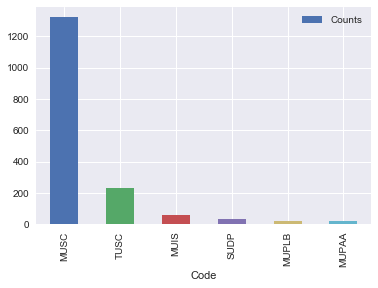

In [15]:
_ = ttc_df_keele_code_top6.plot.bar(x = 'Code', y = 'Counts')


### Step 4

We also plotted the cumulative number of Miscellaneous Speed Control delays at Keele by day of the week and discovered Sunday to have the least amount of delays while Wednesday has the most.

In [16]:
ttc_df_keele_musc = ttc_df_keele.loc[ttc_df_keele['Code'].str.contains('MUSC')] 
ttc_df_keele_musc

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
416,2014/01/08,16:59,Wednesday,KEELE STATION (ENTERIN,MUSC,0,0,W,BD,5212
679,2014/01/13,06:34,Monday,KEELE STATION,MUSC,0,0,W,BD,5221
686,2014/01/13,08:26,Monday,KEELE STATION,MUSC,0,0,W,BD,5221
691,2014/01/13,10:24,Monday,KEELE STATION,MUSC,0,0,W,BD,5221
1070,2014/01/20,15:09,Monday,KEELE STATION (APPROAC,MUSC,0,0,W,BD,5226
1139,2014/01/21,15:02,Tuesday,KEELE STATION,MUSC,0,0,W,BD,5224
1152,2014/01/21,16:20,Tuesday,KEELE STATION,MUSC,0,0,W,BD,5056
1155,2014/01/21,17:00,Tuesday,KEELE STATION,MUSC,0,0,W,BD,5224
1423,2014/01/27,05:52,Monday,KEELE STATION,MUSC,0,0,W,BD,5229
1436,2014/01/27,07:47,Monday,KEELE STATION,MUSC,0,0,W,BD,5229


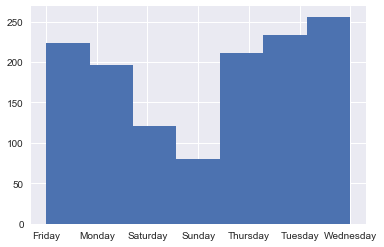

In [17]:
_= ttc_df_keele_musc['Day'].hist(bins = 7)


### Step 5

Finally, having discovered that most of the Miscellaneous Speed Control delays happen due to  break-downs of the older 'fixed block' system which is being replaced by ATC at the beginning of fall 2017, we decided to create a graph to compare whether or not the implementation of the new system had resulted in a decrease to the total number of Miscellaneous Speed Control delays at Keele. ATC is a ‘moving block’ system that uses a computerized infrastructure to track train speeds and distances. Once installed this should increase the frequency of trains and a decrease in delays resulting up to 25 percent more people being able to ride the TTC (Spurr, 2017). 

In [18]:
new_ttc_df_keele = new_ttc_df.loc[new_ttc_df['Station'].str.contains('KEELE STATION')]
new_ttc_df_keele_musc = new_ttc_df_keele.loc[new_ttc_df_keele['Code'].str.contains('MUSC')]

In [19]:
combined_frames = [ttc_df_keele_musc, new_ttc_df_keele_musc]
combined_df = pd.concat(combined_frames)

In [20]:
# This block of code is for us to get a feel for the data
print(ttc_df_keele.shape)
print(ttc_df_keele_musc.shape)
print(new_ttc_df_keele_musc.shape)
print(combined_df.shape)

(2019, 10)
(1322, 10)
(19, 10)
(1341, 10)


In [21]:
combined_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
416,2014/01/08,16:59,Wednesday,KEELE STATION (ENTERIN,MUSC,0,0,W,BD,5212
679,2014/01/13,06:34,Monday,KEELE STATION,MUSC,0,0,W,BD,5221
686,2014/01/13,08:26,Monday,KEELE STATION,MUSC,0,0,W,BD,5221
691,2014/01/13,10:24,Monday,KEELE STATION,MUSC,0,0,W,BD,5221
1070,2014/01/20,15:09,Monday,KEELE STATION (APPROAC,MUSC,0,0,W,BD,5226


In [22]:
combined_df['Date by Month'] = combined_df['Date'].str.slice(0, 7)
combined_df.head()
## We sliced the 'Date' column to only include the year and month in order to analyze the data by month. 
## This was added to a new 'Date by Month' column.

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Date by Month
416,2014/01/08,16:59,Wednesday,KEELE STATION (ENTERIN,MUSC,0,0,W,BD,5212,2014/01
679,2014/01/13,06:34,Monday,KEELE STATION,MUSC,0,0,W,BD,5221,2014/01
686,2014/01/13,08:26,Monday,KEELE STATION,MUSC,0,0,W,BD,5221,2014/01
691,2014/01/13,10:24,Monday,KEELE STATION,MUSC,0,0,W,BD,5221,2014/01
1070,2014/01/20,15:09,Monday,KEELE STATION (APPROAC,MUSC,0,0,W,BD,5226,2014/01


In [23]:
combined_df.shape

(1341, 11)

In [24]:
no_del_df = combined_df['Date by Month'].value_counts()
no_del_df = no_del_df.to_frame().reset_index()
no_del_df_sorted = no_del_df.sort_values(by='index', ascending=True)

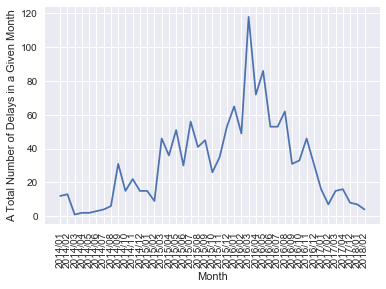

In [31]:
plt.plot('index', 'Date by Month', data = no_del_df_sorted)
_ = plt.xlabel('Month')
_ = plt.ylabel('A Total Number of Delays in a Given Month')
_ = plt.xticks(rotation=90) 
# Turn x-axis lables sideways in order to make the labels legible

matplotlib.rc('xtick', labelsize=5) 
# Reduce the size of the text on the x-axis lables so they all fit without overlapping

## 3. Results

When analyzing the stations with the most delays, we found that the top ten stations were Kipling, Kennedy, Finch, Victoria Park, Downsview, Keele, Eglinton, Warden, Bloor, and Islington stations. The majority of these are terminal stations. As Mike Palmer, the TTC’s Chief Operations Officer, explains, terminal stations often have the most delays since many issues are not discovered until the train comes to its final stop (Spurr, et. al., 2017). We decided to focus on Keele as it has one of the highest number of delays for a non-terminal station. Palmer suggests this is likely due to the large portion of the track by Keele that is uncovered and therefore prone to complications (Spurr, et. al., 2017).  When the delays at Keele were examined, it became clear that MUSC (Miscellaneous Speed Control) delays were by far the most prevalent, outnumbering the next highest delay code by over 1000 counts as MUSC had 1322 counts and TUSC, the next highest, had 233. When plotted by day of the week, Wednesdays appear to have the most delays with a steep drop in numbers over the weekend, with Sunday having significantly fewer delays than the weekdays. These results can be used to analyze the impact of the new ATC system as our data showed the number of MUSC delays prior to the program’s start and after initial implementation and testing. The mean counts below show that prior to December 2017, there was an average of 33 delays per month while from December 2017 to February 2018 the average dropped to only six. 

In [26]:
no_del_df_sorted['Date by Month'].head(40).mean()

33.05

In [27]:
no_del_df_sorted['Date by Month'].tail(3).mean()

6.333333333333333

## 4. Conclusion

This study examined data of TTC subway delays between January 2014 and February 2018. Our focus was on Keele Station, which was one of the stations with the most delays that was not a terminal station (e.g. Downsview, Kipling). We further analyzed the types of delays at Keele Station and found that MUSC (Miscellaneous Speed Control) delays were the most frequent in the data set. Through newspaper articles, we discovered that these delays were being caused by problems with the signalling system on TTC tracks. The TTC spent much of 2017 installing a new signalling system that would aim to curb this problem. This inspired a comparison of the number of MUSC delays before and after the rollout of the new signalling system. We found there was a spike in delays during 2017, and that after November 2017 (when the new system had been installed) delays decreased significantly. Our conclusion is that the signal upgrades seem to have been successful in reducing delays. 

The following are few areas of future research inspired by out analysis: 

1) We noticed that delays dropped over the weekends. We wondered if train volume (that is, number of trains on the tracks) varied between weekdays and weekends and if this has any effect on the number of delays. This would require the city to release a dataset on the train volume by day of the week.

2) This method of analysis proved useful in measuring the impact of a service improvement by the TTC. We wonder whether this type of analysis could be extended to measure other types of service improvements that the TTC has implemented. 

3) The rollout of ATC will continue over the next few years with a projected completition date of 2019. Our conclusion would benefit from continued analysis of the data as more stations are updated to see what the long term effect of the new system will be on the TTC. 


## References
City of Toronto. (n.d.). Transportation – data catalogue: TTC subway delay data. Retrieved from: https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/transportation/#917dd033-1fe5-4ba8-04ca-f683eec89761. 

Ferreira, V. (2016, September 8). What’s making Toronto late for work: explaining the 1,190 subway delays during TTC’s peak season in 2015. National Post. Retrieved from http://nationalpost.com/news/toronto/whats-making-toronto-late-for-work-explainin-the-1190-subway-delays-during-ttc-peak-season-last-year. 

Spurr, B. (2017, November 6). TTC test of new signalling system ‘exceeded expectations’. The Toronto Star. Retrieved from: https://www.thestar.com/news/gta/transportation/2017/11/06/ttc-test-of-new-signalling-system-exceeded-expectations.html. 

Spurr, B., C. Tulk, & D. Schnitman. (2017, June 12). What’s keeping the train? The TTC has 69,000 reasons why. The Toronto Star. Retrieved from https://www.thestar.com/news/gta/2017/06/12/whats-keeping-that-train-the-ttc-has-69000-reasons-why.html. 

Toronto Transit Commission. (n.d.). Automatic train control: project summary. Retrieved from: https://www.ttc.ca/About_the_TTC/Projects/Automatic_Train_Control/index.jsp. 


